In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Retina display
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())


# Also add despine to the bundle using rcParams
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Increase font size to match Beamer template
plt.rcParams['font.size'] = 16
# Make background transparent
plt.rcParams['figure.facecolor'] = 'none'

In [3]:
np.random.seed(42)
num_samples = 100
X1 = np.random.rand(num_samples, 2) + np.array([1, 1])
X2 = np.random.rand(num_samples, 2) + np.array([-1, -1])
X = np.vstack((X1, X2))
y = np.hstack((np.zeros(num_samples), np.ones(num_samples)))

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [4]:
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

In [5]:
model = LogisticRegressionModel()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 50 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch +
              1, num_epochs, loss.item()))

Epoch [50/1000], Loss: 0.1417
Epoch [100/1000], Loss: 0.0846
Epoch [150/1000], Loss: 0.0610
Epoch [200/1000], Loss: 0.0478
Epoch [250/1000], Loss: 0.0395
Epoch [300/1000], Loss: 0.0336
Epoch [350/1000], Loss: 0.0293
Epoch [400/1000], Loss: 0.0260
Epoch [450/1000], Loss: 0.0234
Epoch [500/1000], Loss: 0.0213
Epoch [550/1000], Loss: 0.0195
Epoch [600/1000], Loss: 0.0181
Epoch [650/1000], Loss: 0.0168
Epoch [700/1000], Loss: 0.0157
Epoch [750/1000], Loss: 0.0147
Epoch [800/1000], Loss: 0.0139
Epoch [850/1000], Loss: 0.0131
Epoch [900/1000], Loss: 0.0125
Epoch [950/1000], Loss: 0.0119
Epoch [1000/1000], Loss: 0.0113


findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

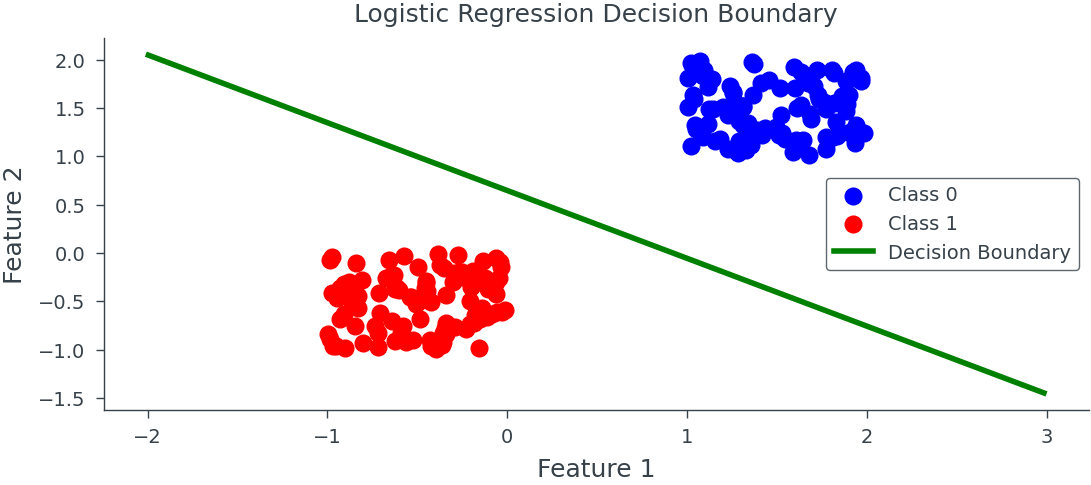

In [7]:
plt.scatter(X1[:, 0], X1[:, 1], color='blue', label='Class 0')
plt.scatter(X2[:, 0], X2[:, 1], color='red', label='Class 1')

with torch.no_grad():
    w = model.linear.weight.numpy()
    b = model.linear.bias.numpy()
    x_boundary = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    y_boundary = -(w[0][0] * x_boundary + b) / w[0][1]
    plt.plot(x_boundary, y_boundary, color='green',
             linewidth=2, label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.savefig('figures/mle/log_reg.pdf')